# GrassCheck NI

<https://agrisearch.org/grasscheck>

Huson, K. M., Lively, F. O., Aubry, A., Takahashi, T., Gordon, A. and
McDonnell, D. A. (2020).
'GrassCheck: monitoring grass growth and maximizing grass utilisation on UK
farms',
in Virkajärvi, P. et al. (eds),
*Meeting the future demands for grassland production*,
Grassland Science in Europe, Helsinki, Finland, European Grassland Federation,
vol. 25, pp. 716-718. [Online]. Available at
<https://www.europeangrassland.org/fileadmin/documents/Infos/Printed_Matter/Proceedings/EGF2020.pdf>
(Accessed 13 September 2022).

In [1]:
import os
from datetime import datetime, timezone
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
print("Last updated:", datetime.now(tz=timezone.utc))

Last updated: 2023-02-24 19:55:03.975629+00:00


In [3]:
DATA_DIR = os.path.join("data", "grass_growth", "grasscheck", "grasscheck.ods")

In [4]:
grass_ts = pd.read_excel(DATA_DIR, parse_dates=["week"])

In [ ]:
# rename column
grass_ts.rename(columns={"week": "time"}, inplace=True)

In [5]:
grass_ts.head()

,week,derry,antrim,down,armagh,fermanagh,tyrone
0,2017-04-03,26.7,17.7,24.4,17.8,27.4,18.9
1,2017-04-10,36.0,30.0,39.0,42.0,37.0,27.0
2,2017-04-17,38.4,54.8,41.1,47.7,47.5,42.3
3,2017-04-24,56.0,52.0,55.0,53.0,56.0,56.0
4,2017-05-01,35.8,35.7,63.7,73.4,36.0,55.1


In [6]:
grass_ts.shape

(185, 7)

In [7]:
# use weekly time series starting on Monday to fill missing rows
grass_ = pd.DataFrame(
    pd.date_range(
        str(grass_ni["time"][0].year) + "-01-01",
        str(grass_ni["time"][len(grass_ni) - 1].year) + "-12-31",
        freq="W-MON"
    ),
    columns=["time"]
)

In [8]:
grass_ts = pd.merge(grass_, grass_ts, how="outer")

In [9]:
grass_ts.head()

,week,derry,antrim,down,armagh,fermanagh,tyrone
0,2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-16,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-23,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-30,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
grass_ts.shape

(313, 7)

In [13]:
DATA_DIR = os.path.join(
    "data", "grass_growth", "grasscheck", "grasscheck.csv"
)

In [14]:
# save time series
grass_ts.to_csv(DATA_DIR, index=False)

In [15]:
# set timestamps as the index
grass_ts.set_index("time", inplace=True)

In [16]:
# capitalise county names
counties = []
for c in list(grass_ts):
    counties.append(c.capitalize())
grass_ts.columns = counties

In [18]:
grass_ts.head()

,Derry,Antrim,Down,Armagh,Fermanagh,Tyrone
week,,,,,,
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-16,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-23,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-30,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# pivot table for plotting
grass_piv = grass_ts.copy()
grass_piv["year"] = grass_piv.index.year
grass_piv["weekno"] = grass_piv.index.isocalendar().week
grass_piv = pd.pivot_table(grass_piv, index="weekno", columns="year")

In [24]:
grass_piv.head()

Antrim                               Armagh                    ...  \
year     2017  2018  2019  2020  2021  2022   2017  2018  2019  2020  ...   
weekno                                                                ...   
12        NaN   NaN  13.4   NaN  14.6  17.6    NaN   NaN  16.0   NaN  ...   
13        NaN  15.3  23.6   8.2  22.6  36.1    NaN   9.4  19.1   9.9  ...   
14       17.7   6.0  30.0   8.2  48.6  37.1   17.8  12.3  33.8   9.9  ...   
15       30.0  12.0  26.4  22.7  33.0  39.0   42.0   9.7  30.4  21.2  ...   
16       54.8  17.3  47.3  49.8  27.0  58.2   47.7  23.2  34.8  48.8  ...   

       Fermanagh                   Tyrone                                
year        2019  2020  2021  2022   2017  2018  2019  2020  2021  2022  
weekno                                                                   
12           8.9   NaN  30.2  10.8    NaN   NaN  21.0   NaN  20.6  11.5  
13          27.1   3.7  19.4  15.7    NaN   2.8  21.1   6.6  20.4  19.9  
14          25.9   3.7  27.9  22.1   18.9   8.2  31.6   6.6  32.0  32.9  
15          25.9  32.0  54.1  19.9   27.0   5.4  27.2  14.3  21.1  27.1  
16          35.0  45.9  27.6  28.9   42.3  20.9  32.4  43.8  31.8  27.1  

[5 rows x 36 columns]

## Time series

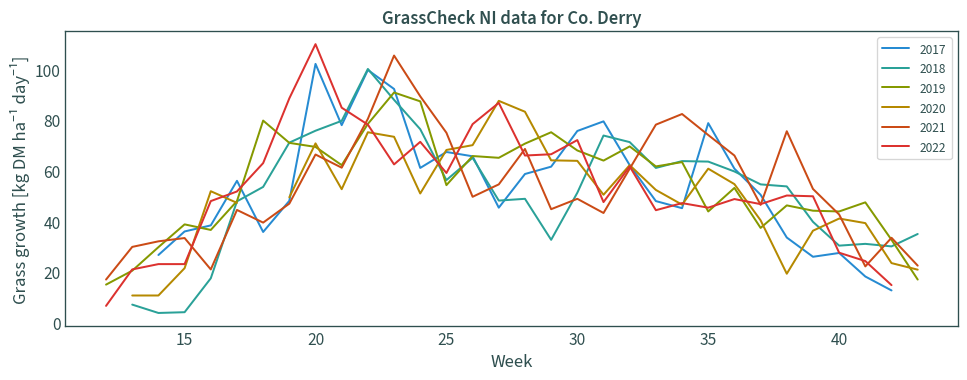

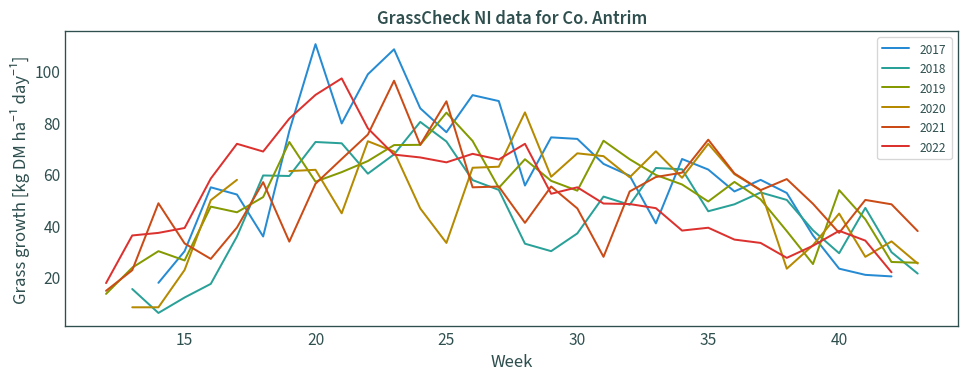

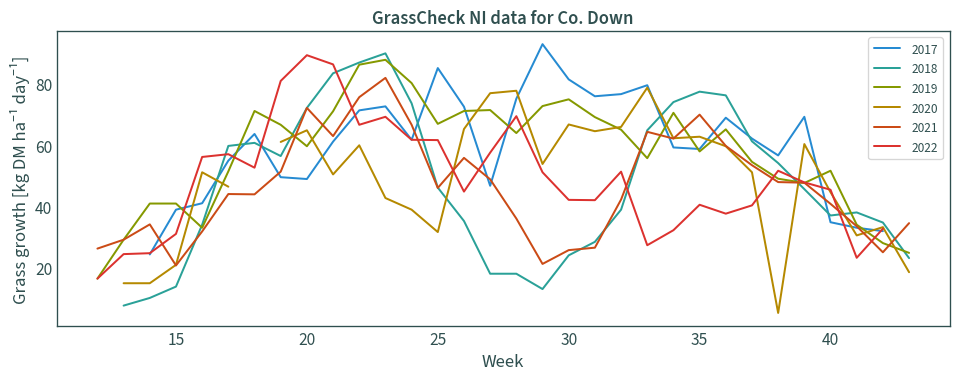

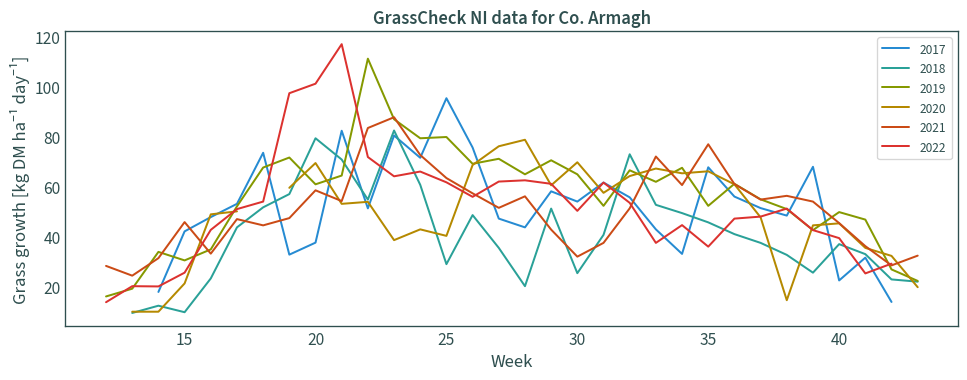

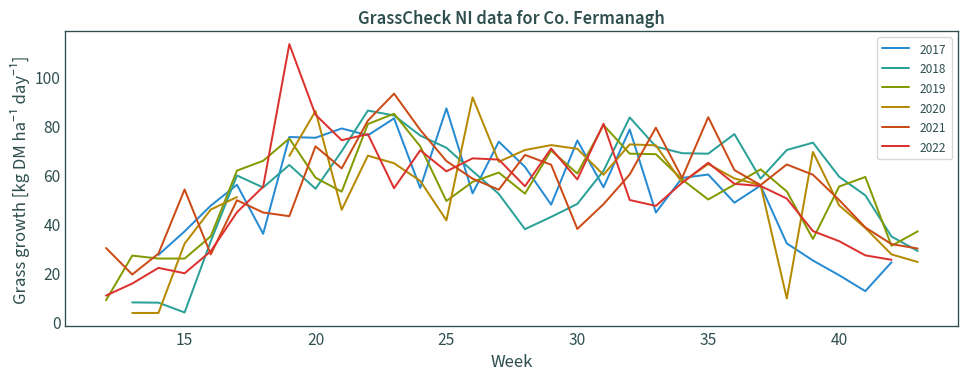

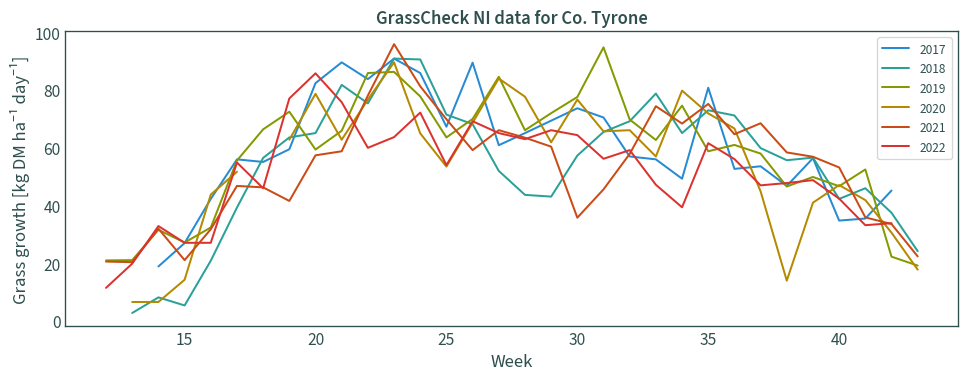

In [25]:
for county in counties:
    grass_piv[county].plot(
        figsize=(12, 4), xlabel="Week",
        ylabel="Grass growth [kg DM ha⁻¹ day⁻¹]"
    )
    plt.title(f"GrassCheck NI data for Co. {county}")
    plt.legend(title=None)
    plt.tight_layout()
    plt.show()

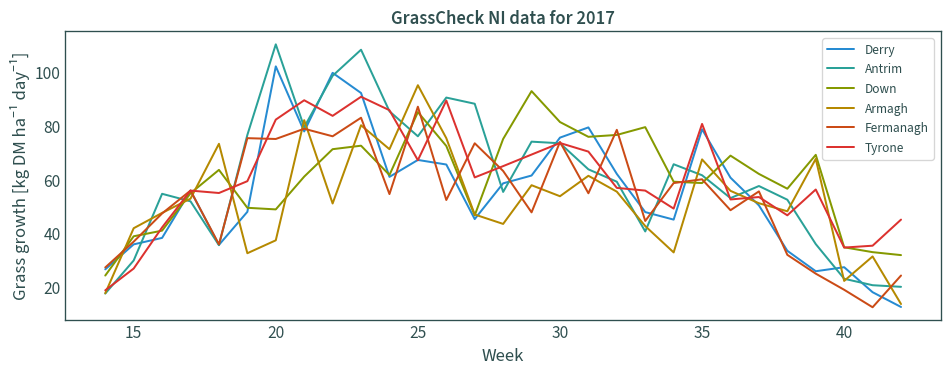

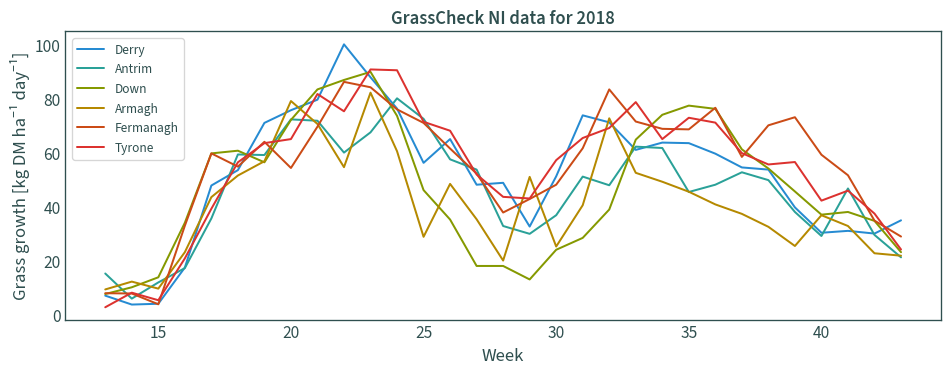

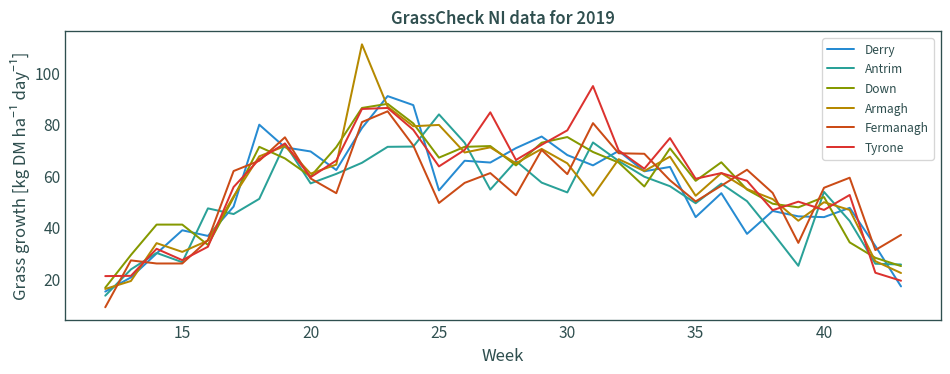

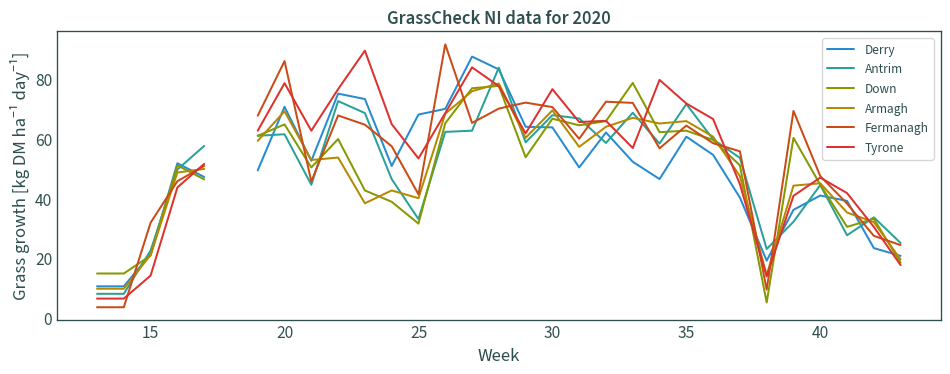

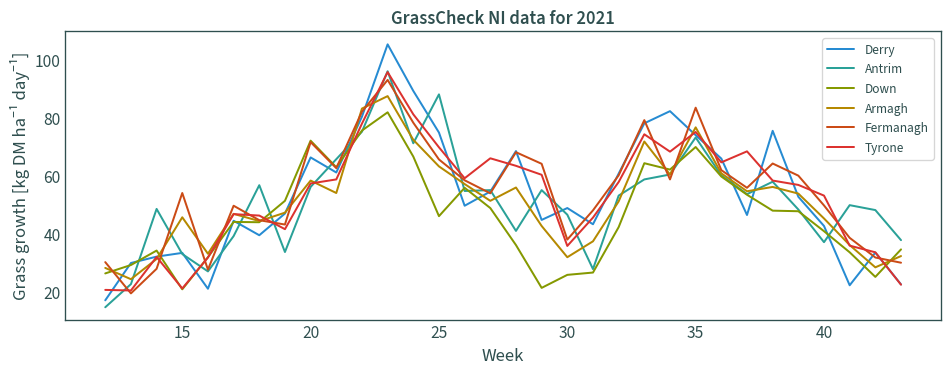

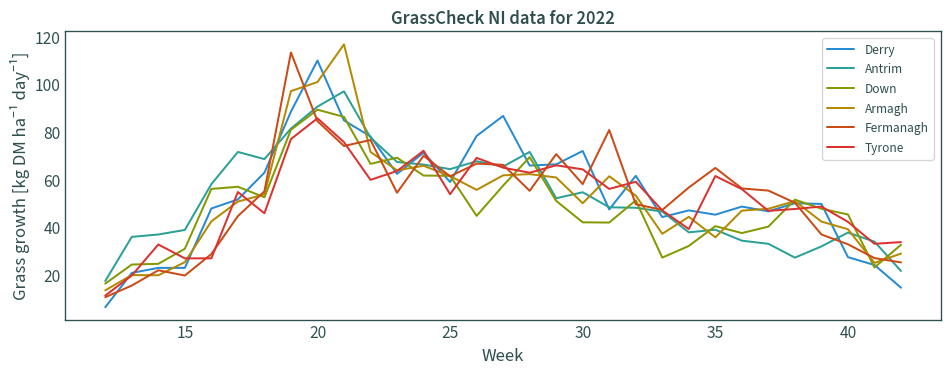

In [28]:
years = list(grass_ts.index.year.unique())
for y in years:
    grass_ts.loc[str(y)].set_index(
        grass_ts.loc[str(y)].index.isocalendar().week
    ).plot(
        figsize=(10, 4), xlabel="Week",
        ylabel="Grass growth [kg DM ha⁻¹ day⁻¹]"
    )
    plt.title(f"GrassCheck NI data for {y}")
    plt.tight_layout()
    plt.show()

## Distribution

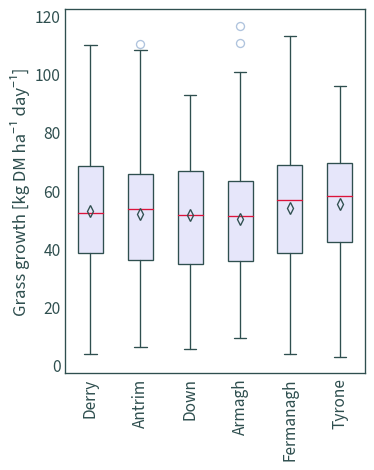

In [26]:
grass_ts.plot.box(
    figsize=(4, 5), showmeans=True, patch_artist=True,
    color={
        "medians": "Crimson",
        "whiskers": "DarkSlateGrey",
        "caps": "DarkSlateGrey"
    },
    boxprops={"facecolor": "Lavender", "color": "DarkSlateGrey"},
    meanprops={
        "markeredgecolor": "DarkSlateGrey",
        "marker": "d",
        "markerfacecolor": (1, 1, 0, 0)  # transparent
    },
    flierprops={"markeredgecolor": "LightSteelBlue", "zorder": 1}
)
plt.xticks(rotation="vertical")
plt.ylabel("Grass growth [kg DM ha⁻¹ day⁻¹]")
plt.tight_layout()
# plt.savefig(os.path.join("data", "grass_growth", "grasscheck", "boxplot.png"))
plt.show()

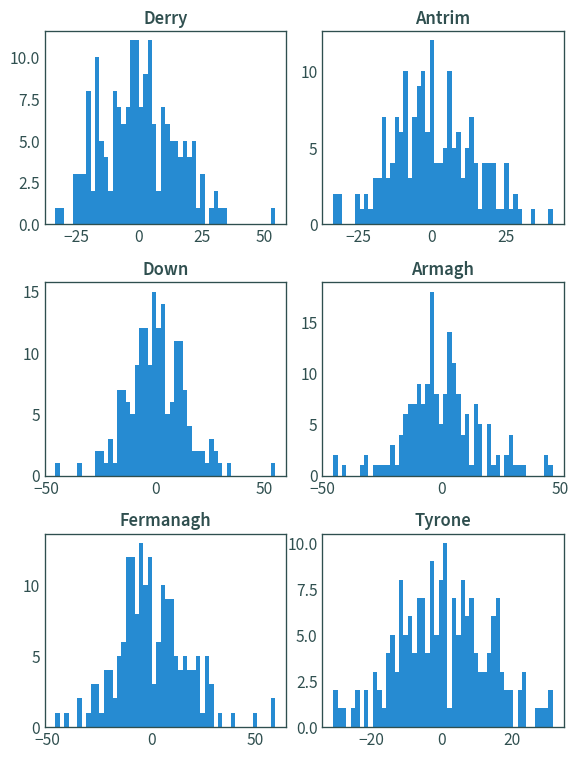

In [27]:
grass_ts.diff().hist(figsize=(6, 8), bins=50, grid=False)
plt.tight_layout()
# plt.savefig(os.path.join("data", "grass_growth", "grasscheck", "diff_hist.png"))
plt.show()

## Filtering outliers using 3-week moving average

In [59]:
grass_out = grass_ts.reset_index()

In [61]:
for county in counties:
    mn = grass_out.rolling(3, center=True, on="time")[county].mean()
    grass_out[f"{county}_outlier"] = (
        grass_out[county].sub(mn).abs().gt(10)
    )
    grass_out[f"{county}_mn"] = mn

In [62]:
grass_out.set_index("time", inplace=True)

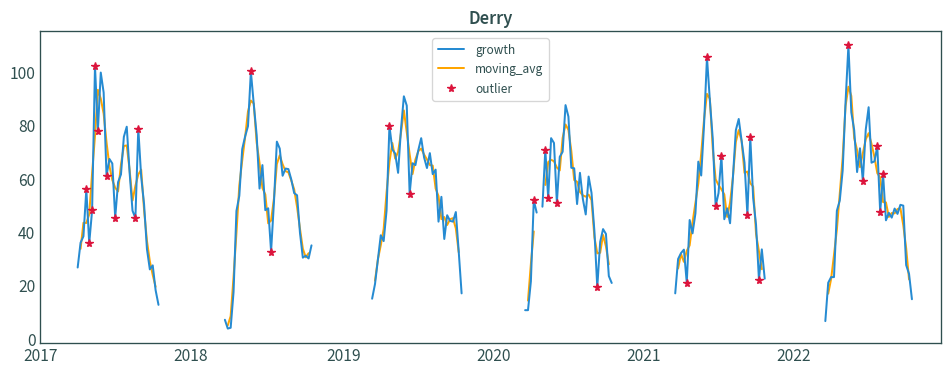

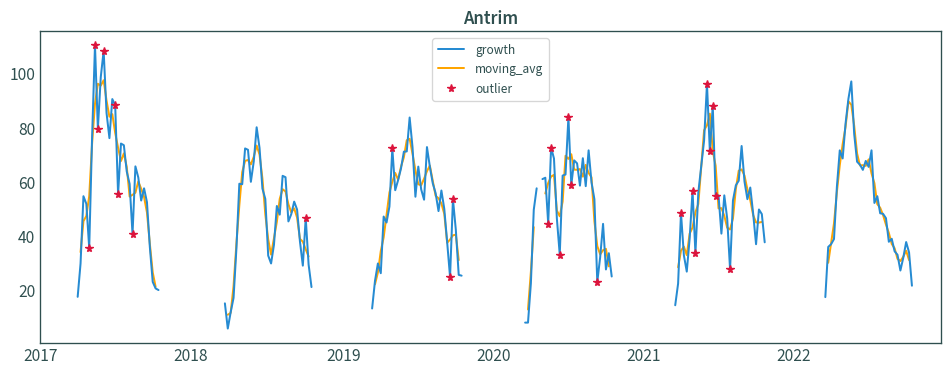

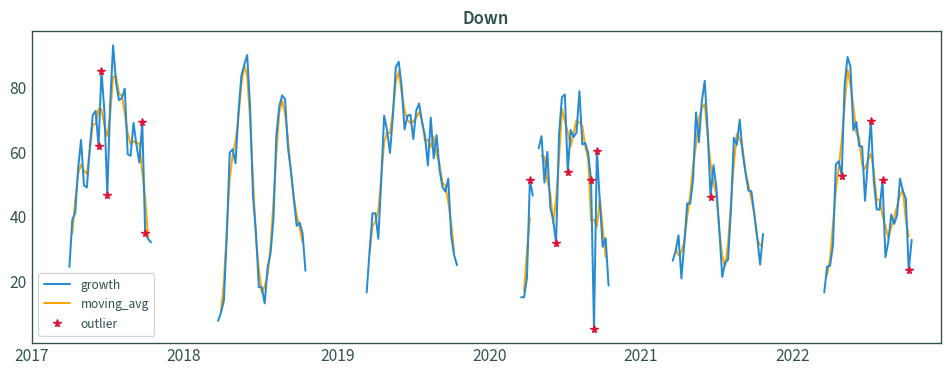

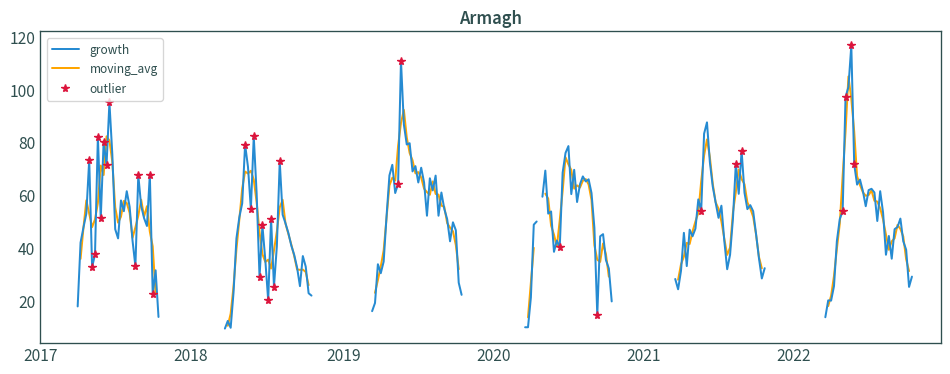

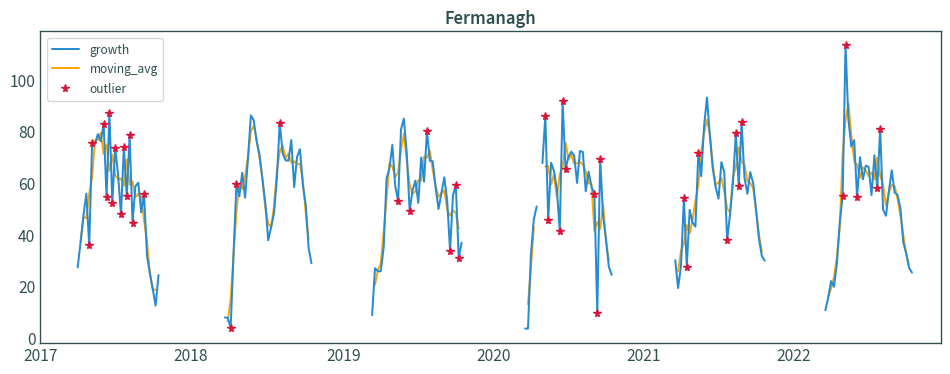

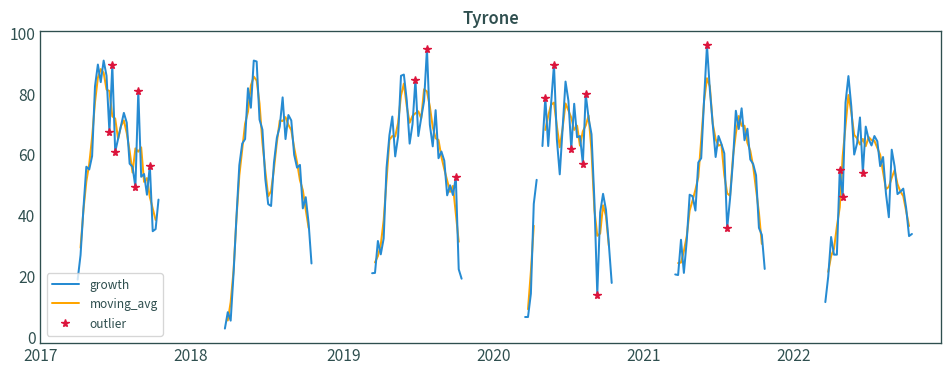

In [63]:
for county in counties:
    axs = grass_out.plot(
        # ylim=[0.0, 200.0],
        figsize=(10, 4), y=county, label="growth"
    )
    grass_out.plot(
        figsize=(10, 4), y=f"{county}_mn", ax=axs, label="moving_avg",
        color="orange", zorder=1
    )
    grass_out[grass_out[f"{county}_outlier"] == True].plot(
        ax=axs, linewidth=0.0, marker="*", y=county, label="outlier",
        color="crimson"
    )
    plt.title(county)
    plt.xlabel("")
    plt.tight_layout()
    plt.show()

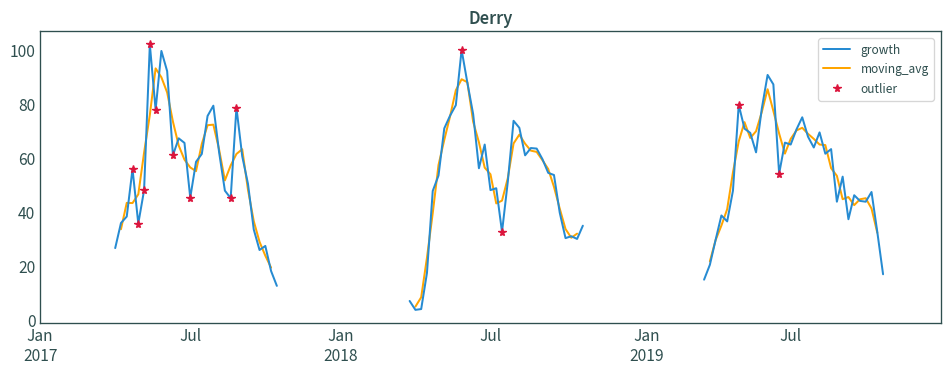

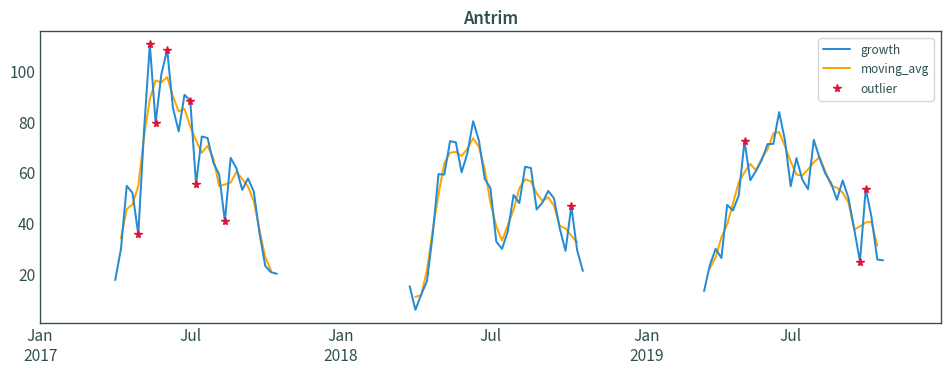

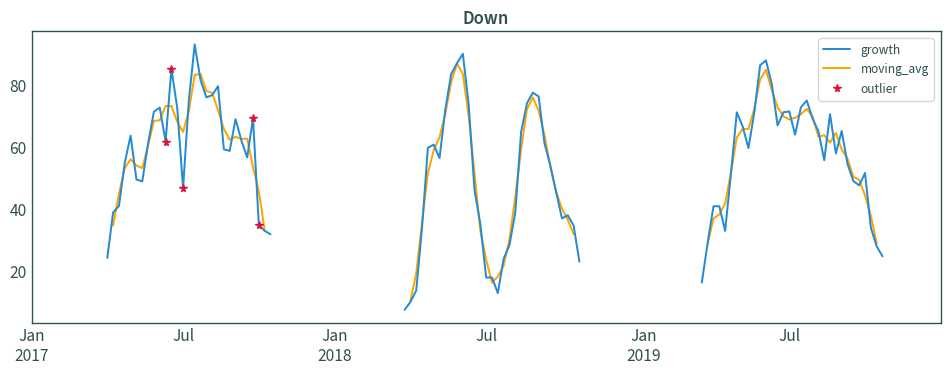

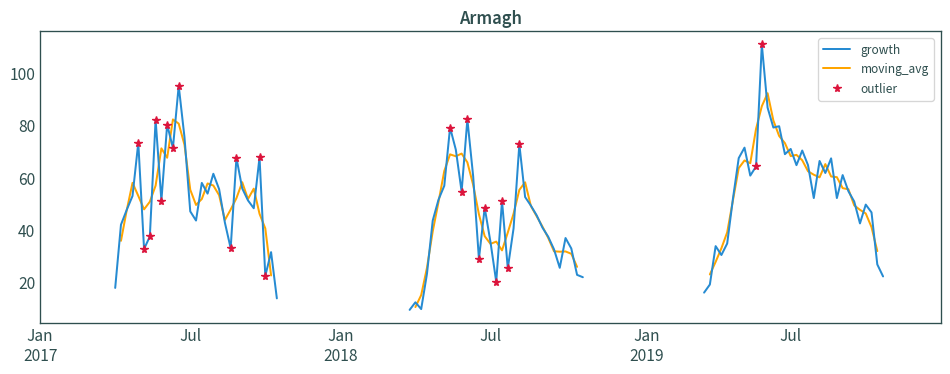

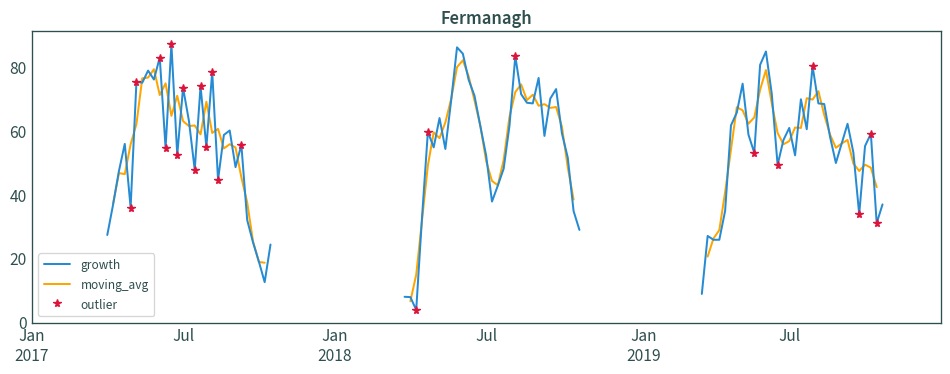

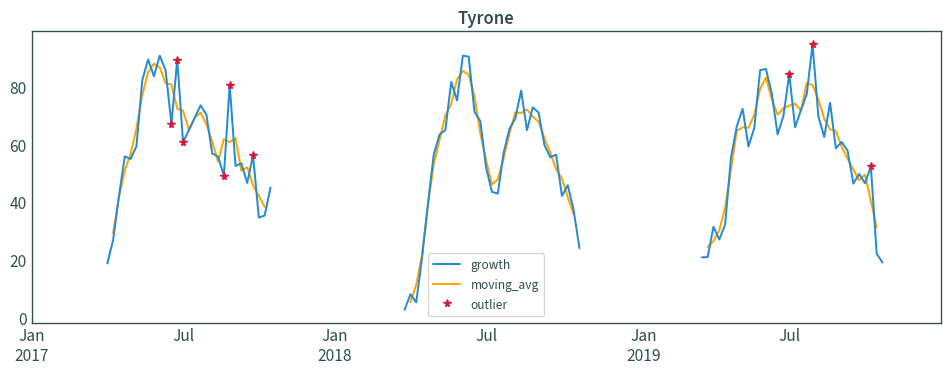

In [64]:
for county in counties:
    axs = grass_out.loc["2017":"2019"].plot(
        # ylim=[0.0, 200.0],
        figsize=(12, 8), y=county, label="growth"
    )
    grass_out.loc["2017":"2019"].plot(
        figsize=(10, 4), y=f"{county}_mn", ax=axs, label="moving_avg",
        color="orange", zorder=1
    )
    grass_out[grass_out[f"{county}_outlier"] == True].loc["2017":"2019"].plot(
        ax=axs, linewidth=0.0, marker="*", y=county, label="outlier",
        color="crimson"
    )
    plt.title(county)
    plt.xlabel("")
    plt.tight_layout()
    plt.show()

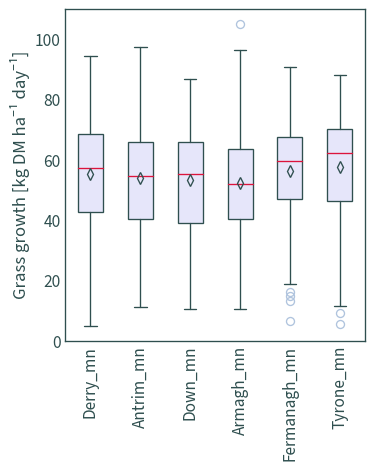

In [70]:
grass_out[[f"{county}_mn" for county in counties]].plot.box(
    figsize=(4, 5), showmeans=True, patch_artist=True,
    color={
        "medians": "Crimson",
        "whiskers": "DarkSlateGrey",
        "caps": "DarkSlateGrey"
    },
    boxprops={"facecolor": "Lavender", "color": "DarkSlateGrey"},
    meanprops={
        "markeredgecolor": "DarkSlateGrey",
        "marker": "d",
        "markerfacecolor": (1, 1, 0, 0)  # transparent
    },
    flierprops={"markeredgecolor": "LightSteelBlue", "zorder": 1}
)
plt.xticks(rotation="vertical")
plt.ylabel("Grass growth [kg DM ha⁻¹ day⁻¹]")
plt.tight_layout()
# plt.savefig(os.path.join("data", "grass_growth", "grasscheck", "boxplot.png"))
plt.show()